In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("placement.csv")

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in LPA)')

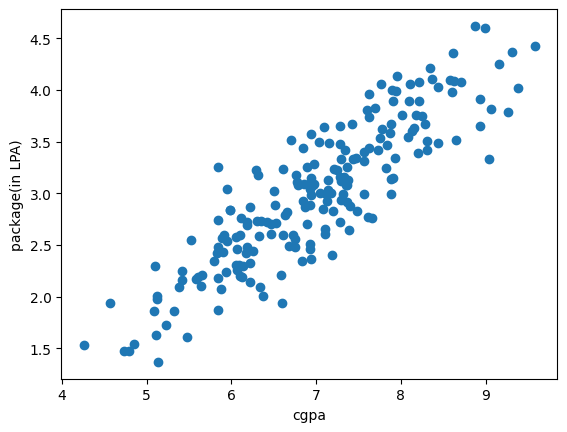

In [6]:
plt.scatter(df["cgpa"], df["package"])
plt.xlabel("cgpa")
plt.ylabel("package(in LPA)")

In [20]:
X = df.iloc[:,0:1]
y = df.iloc[:, -1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)
x_train.shape

(160, 1)

In [22]:
X_test.shape

(40, 1)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [25]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

F:\python program\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [30]:
y_test.iloc[0]

4.1

Text(0, 0.5, 'package(in lpa)')

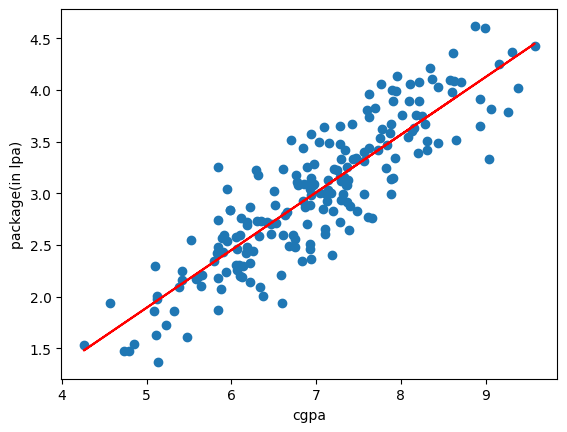

In [33]:
plt.scatter(df["cgpa"], df["package"])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel("cgpa")
plt.ylabel("package(in lpa)")

In [35]:
m = lr.coef_
m

array([0.55795197])

In [36]:
b = lr.intercept_
b

-0.8961119222429144

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mae = mean_absolute_error(y_test, lr.predict(X_test))
mae

0.2884710931878175

In [42]:
mse = mean_squared_error(y_test, lr.predict(X_test))
mse

0.12129235313495527

In [46]:
r2 = r2_score(y_test, lr.predict(X_test))
r2

0.780730147510384

In [44]:
# Adjusted R2 Score
X_test.shape

(40, 1)

In [47]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [49]:
new_df = df.copy()
new_df['iq'] = new_df['package'] + (np.random.randint(-12,12,200)/10)
new_df = new_df[['cgpa', 'iq', 'package']]
new_df.head()

,cgpa,iq,package
0,6.89,3.96,3.26
1,5.12,2.08,1.98
2,7.82,3.15,3.25
3,7.42,3.57,3.67
4,6.94,4.27,3.57


Text(0, 0.5, 'package(in LPA)')

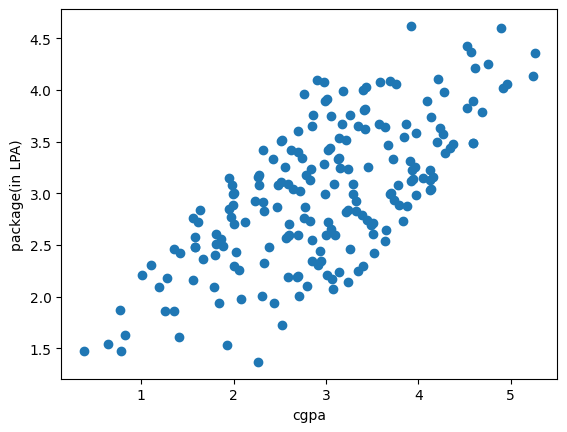

In [51]:
plt.scatter(new_df["iq"], new_df["package"])
plt.xlabel("cgpa")
plt.ylabel("package(in LPA)")

In [52]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:, -1]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([3.7308759 , 3.32748368, 2.49201069, 2.53273688, 1.68055528,
       1.61581921, 1.94068188, 2.87436512, 3.89393999, 2.86003971,
       3.89193705, 3.49092803, 2.81212619, 2.50926276, 2.99519427,
       3.41375172, 1.84856821, 3.2925577 , 2.76610168, 3.35090083,
       2.52657949, 3.19197194, 2.87832558, 2.9927541 , 3.66497287,
       2.70702882, 3.56877326, 3.35169138, 3.87955762, 2.0766193 ,
       3.73983063, 3.066274  , 3.54232322, 2.72854541, 2.49720278,
       3.2478749 , 3.40040315, 2.81918806, 2.59997777, 2.8371129 ])

In [57]:
mean_absolute_error(y_test, y_pred)

0.22763942784863814

In [58]:
mean_squared_error(y_test, y_pred)

0.08408486660421624

In [59]:
r2_score(y_test, y_pred)

0.8479930859581775

In [ ]:
1 - ((1-r2)*(